# Deutsch's Algorithm

# 1. Introduction

**Overview**
<br>
The Boolean function problem is a fundamental computer science problem that is addressed by the Deutsch algorithm. This problem involves determining the nature of an unknown function that takes a single bit as output. The algorithm specifically deals with the division of these functions into two groups: balanced and constant.

A function is regarded as constant in this sense if it returns the same value (either 0 or 1) for every possible input. On the other hand, if a function yields 0 for half of the inputs and 1 for the other half, it is said to be balanced.[[1]](https://arxiv.org/pdf/quant-ph/9707033.pdf)

**Solutions and Limitations**
<br>
In the usual way of tackling this issue, you'd typically query the boolean function twice, once for each potential input, and then take note of the resulting values. The outputs for a balanced function will differ for at least one pair of inputs, whereas the outputs for a constant function will always be the same.

Although this classical approach is quite straightforward, as the input space increases, it becomes inefficient. For n-bit functions, the classical algorithm requires $ 2^{n-1} + 1 $ queries in the worst case, making it inefficient for large input spaces.[[2]](https://link.springer.com/article/10.1007/s11128-017-1679-7)

**Quantum Advantage**
<br>
David Deutsch developed the algorithm in the 1980s, which uses quantum parallelism to solve the Boolean function problem with just one query. The advantage comes from the ability of quantum bits, or qubits, to exist in multiple states at once through a process known as superposition.

Taking advantage of this characteristic, the quantum algorithm can assess the function for both potential inputs at the same time, resulting in a significant decrease in the necessary queries. This quantum parallelism highlights the potential for quantum computers to surpass classical counterparts in certain problem domains, even for tasks that may seem straightforward, such as the Boolean function problem. 

In the upcoming sections, we'll delve into the details of Deutsch's algorithm, examine how it's implemented in a quantum circuit using Qiskit, and simulate it's performance to illustrate its effectivess in solving this particular problem.

## 2. Problem Statement

Deutsch's algorithm addresses a specific problem in quantum computing known as the **Boolean function problem**. The task is to determine the nature of a given Boolean function, which takes a single bit as input and produces a single bit as output. In particular, Deutsch's algorithm classifies these functions into two distinct categories: **constant** or **balanced**.

### Mathematical Formulation [[3]](https://medium.com/a-bit-of-qubit/deutsch-jozsa-algorithm-quantum-computing-basics-708df8c4caf7)

Let $( f: {0,1} -> {0,1} )$ represent the Boolean function in question. The problem can be formally defined as follows:


$f(x) =
\begin{cases} 
0 & \text{if } f(0) = f(1) \\
1 & \text{if } f(0) \neq f(1)
\end{cases}$


Here, $( f(0) )$ and $( f(1) )$ denote the outputs of the function for the inputs 0 and 1, respectively. The goal is to determine if the function is **constant** (outputs 0 for all inputs) or **balanced** (outputs 0 for half the inputs and 1 for the other half).


## 3. Deutsch's Algorithm

In order to solve the Boolean function problem more quickly than using traditional techniques, David Deutsch developed a basic quantum computing algorithm. With just one query to the function's oracle, it uses the ideas of quantum parallelism and interference to determine if a given Boolean function is constant or balanced.

### Quantum Parallelism
In traditional computing, one usually gathers knowledge about the behaviour of a function by systematically evaluating it at various points. On the other hand, Deutsch's approach makes use of quantum parallelism. It makes use of qubits, which by superposition are capable of being in several states at once. When dealing with a single qubit, this entails simultaneously evaluating the function for each potential input.

### Key Steps:[[4]](https://people.vcu.edu/~sgharibian/courses/CMSC491/notes/Lecture%206%20-%20Deutsch's%20algorithm.pdf)
1. **Initialization:** Begin with two qubits initialized to the state $$ |01\rangle $$
2. **Superposition:** Apply a Hadamard gate to each qubit to create a superposition of all possible states. $$ \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$
3. **Oracle Query:** Apply the oracle function, which is represented by a quantum gate to the superposition of states. This step is crucial for the algorithm's efficiency. $$ \frac{1}{\sqrt{2}}(|f(0)\rangle - |f(1)\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) $$
4. **Analysis:** Apply Hadamard gates again to the first qubit to bring it back to the computational basis. This step amplifies the amplitudes of the states corresponding to the function outputs. $$ \frac{1}{\sqrt{2}}(|f(0)\rangle - |f(1)\rangle) $$
5. **Measurement:** Finally, measure the first qubit. If the result is $( |0\rangle )$, the function is constant; if the result is $( |1\rangle )$, the function is balanced.

#### Mathematical Representation:
The algorithm's quantum circuit can be succinctly represented in LaTeX notation. For example, the circuit implementing Deutsch's algorithm for a specific oracle function $( U_f )$ can be expressed as follows: $$ |0\rangle \xrightarrow{\text{H}} \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \xrightarrow{\text{U}_f} \frac{1}{\sqrt{2}}(|f(0)\rangle - |f(1)\rangle) \xrightarrow{\text{H}} \text{Result} $$

## 4. Qiskit Circuit Implementation
In this section, we will implement Deutsch's algorithm using Qiskit, a popular quantum computing framework, and define the quantum circuit step by step. In this example we will imlement on a three-bit function. First we imort the necessary libraries. [[5]](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb)

In [25]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

### 4.1 Constant Oracle
Now we set the length of the n-bit input string. We create a constant oracle, which in this case has no effect on the output so we set the output qubit to be 0 or 1.

In [26]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()


q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

### 4.2 Creating the Balanced Oracle
Now, we create a balanced oracle. Such an oracle is achievable through executing controlled-NOT (CNOT) operations, using each of the input qubits as a control and the output qubit as the target. The alteration of input states that result in either 0 or 1 is feasible by encasing certain control qubits with X-gates. Initially, we select a binary sequence of n length to determine the specific controls to be encased. 

In [27]:
balanced_oracle = QuantumCircuit(n+1)

Now we use a string, it serves as a guide for positioning our X-gates. For every qubit in our circuit, an X-gate is placed if the matching digit in b_str is 1. Conversely, if the digit is 0, no action is taken.

In [28]:
b_str = "101"

balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

### 4.3 Setting up the Quantum Circuit
Next, we proceed with our CNOT gates, using each qubit as a control, and the output qubit as a target.

In [29]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

Now, we repeat the code from the previous cells to wrap the controls in X-gates.

In [30]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

### 4.4 Executing the Quantum Circuit
We have created a balanced oracle. Now we see if Deutsch's Algorithm can solve it. The initial procedure in our algorithm involves setting the input qubits to the $ |+\rangle $ state and the output qubit to the $ |-\rangle $ state.

In [31]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

Next, we proceed to implement the oracle. We utilize the balanced_oracle that was previously created.

In [32]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

To conclude, we execute Hadamard gates (H-gates) on the $n$-input qubits and then proceed to measure the input register.

In [33]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

Let's see the output:

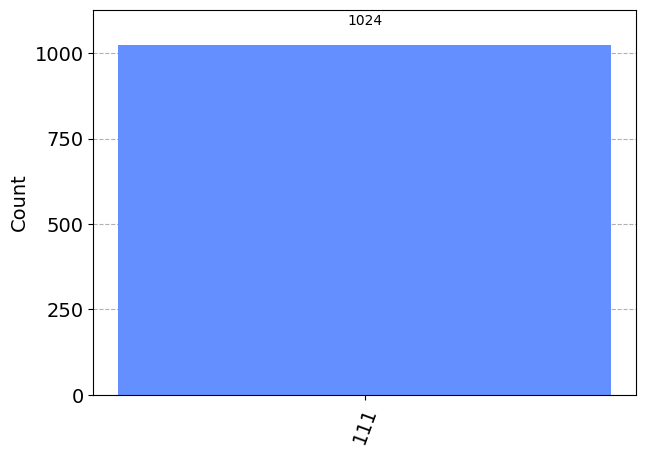

In [34]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [35]:
# ...we have a 0% chance of measuring 000. 
assert answer.get('000', 0) == 0

The outcomes depicted above confirm the the likelihood of measuring 000 is 0%. This accurately indicates that the function maintains balance.

# References

- Josza, Richard (1998) *Quantum algorithms and the Fourier transform*[[1]](https://arxiv.org/pdf/quant-ph/9707033.pdf)
- Johansson, Niklas and Larsson, Jan (2017) *Efficient classical simulation of the Deutsch–Jozsa and Simon’s algorithms*[[2]](https://link.springer.com/article/10.1007/s11128-017-1679-7)
- Battacharyya, Saptashwa (2021) *Deutsch-Jozsa Algorithm: Quantum Computing Basics* [[3]](https://medium.com/a-bit-of-qubit/deutsch-jozsa-algorithm-quantum-computing-basics-708df8c4caf7)
- Gharibian, Sevag (2015)[[4]](https://people.vcu.edu/~sgharibian/courses/CMSC491/notes/Lecture%206%20-%20Deutsch's%20algorithm.pdf)
- GitHub [[5]](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb)